# Generate the subsets of the dataset for calculating counter factuals
To calculate the LDS (Linear Datamodeling Score), we need a large number of diffusion models each trained over different subsets of the whole dataset (in our case, CIFAR-10).

DTRAK uses 64 subsets, each covering 50% of the orignal dataset, then fine tunes 9 stable diffusion models on each subset. Unfortunately this is infeasible for our hardware, so we instead use 32 subsets of 50% coverage, and train a single diffusion model on each.

In [1]:
from counter_factuals.counter_factuals_utils import Counter_Factual_Dataset_Generator
counter_factual_dataset_generator = Counter_Factual_Dataset_Generator()

/home/joy/miniconda3/envs/SD3HF_Unstable/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/joy/miniconda3/envs/SD3HF_Unstable/lib/python3.10/site-packages/xformers/ops/fmha/flash.py:211: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_fwd")
/home/joy/miniconda3/envs/SD3HF_Unstable/lib/python3.10/site-packages/xformers/ops/fmha/flash.py:344: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_bwd")


In [2]:
counter_factual_dataset_generator.generate_base_dataset()

'Success!'

In [3]:
import datasets
test_ds = datasets.load_dataset(counter_factual_dataset_generator.base_path, split="train")

[26665 29261 11176 38139 49768]


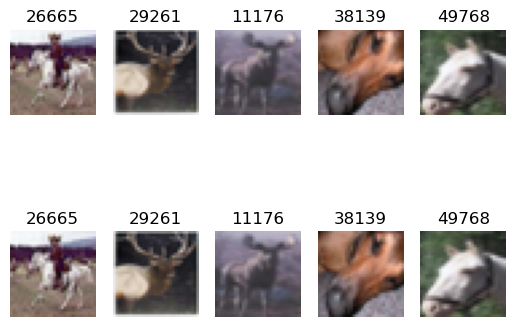

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
rng = np.random.default_rng()

#indicies_to_test = [5,42,4363,18302,360]
indicies_to_test = rng.choice(50000,5, replace=False)
print(indicies_to_test)
num_to_test = len(indicies_to_test)

for i,image_index in enumerate(indicies_to_test):
    image_index = int(image_index)
    plt.subplot(2, num_to_test, i+1)
    plt.axis('off')
    plt.title(image_index)
    plt.imshow(counter_factual_dataset_generator.dataset_config.dataset[image_index]["image"])
    plt.subplot(2, 5, i+1+num_to_test)
    plt.axis('off')
    plt.title(image_index)
    plt.imshow(test_ds[image_index]["image"])